In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import vice 
import numpy as np 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.2.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:125: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [6]:
def setup_axis_time(): 
    r""" 
    Setup a single subplot on which to plot the running total enrichment 
    of nitrogen as a function of age from a single stellar population. 
    """ 
    fig = plt.figure(figsize = (7, 7), facecolor = "white") 
    ax = fig.add_subplot(111) 
    ax.set_xscale("log") 
    ax.set_xlabel("Age [Gyr]") 
    ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
    plots.mpltoolkit.xticklabel_formatter(ax) 
    ax.set_xlim([0.008, 20]) 
    ax.set_ylim([0.36, 1.04])
    return ax 

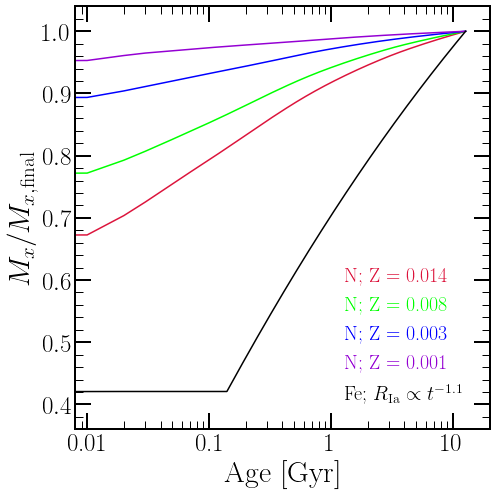

In [7]:
total_time = 12.7 # Gyr, total time to run SSP calculation for
ax = setup_axis_time() 
vice.yields.ccsne.settings['fe'] = 0.0012 
vice.yields.sneia.settings['fe'] = 0.0017 
vice.yields.ccsne.settings['n'] = 5e-4 
vice.yields.agb.settings['n'] = "cristallo11" 
metallicities = [0.014, 0.008, 0.003, 0.001] 
colors = ["crimson", "lime", "blue", "darkviolet"] 
for i in range(len(metallicities)): 
    mass, time = vice.single_stellar_population('n', Z = metallicities[i], time = total_time) 
    mass = [_ / mass[-1] for _ in mass] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": "N; Z = %g" % (metallicities[i]) 
    } 
    ax.plot(time, mass, **kwargs) 
mass, time = vice.single_stellar_population('fe', time = total_time) 
mass = [_ / mass[-1] for _ in mass] 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "label": r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
} 
ax.plot(time, mass, **kwargs) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 20, handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
for i in range(len(metallicities)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
leg.legendHandles[i + 1].set_visible(False)
    
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_vs_fe_ssp.%s" % (ext)) 